In [ ]:
import pandas as pd

# قراءة البيانات
file_path = "/content/Superstore Sales Dataset.csv"
data = pd.read_csv(file_path)

In [ ]:
# 1. إزالة الصفوف المكررة
data = data.drop_duplicates()

# 2. تحويل الأعمدة "Order Date" و "Ship Date" إلى تنسيق موحد (YYYY-MM-DD)
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce', dayfirst=True)
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce', dayfirst=True)


In [ ]:
# 3. التعامل مع القيم المفقودة في "Postal Code"
data['Postal Code'] = data['Postal Code'].fillna('Unknown').astype(str)

# 4. توحيد تنسيق النصوص في "Category" و "Region" (تحويل إلى أحرف صغيرة)
data['Category'] = data['Category'].str.lower().str.strip()
data['Region'] = data['Region'].str.lower().str.strip()

# عرض أول 5 صفوف للتأكد من التنظيف
print(data.head())


   Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08 2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12 2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11 2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  Postal Code Region       Product ID         Category Sub-Cat

In [ ]:
# حفظ الملف بعد التنظيف
import pandas as pd
import os
os.makedirs("/mnt/data", exist_ok=True)

data.to_csv("/mnt/data/Cleaned_Superstore_Sales_Dataset.csv", index=False)
print("تم تنظيف البيانات وحفظها في ملف جديد: Cleaned_Superstore_Sales_Dataset.csv")

تم تنظيف البيانات وحفظها في ملف جديد: Cleaned_Superstore_Sales_Dataset.csv


In [ ]:
print("عدد الصفوف قبل التنظيف:", len(pd.read_csv(file_path)))
print("عدد الصفوف بعد التنظيف:", len(data))


عدد الصفوف قبل التنظيف: 9800
عدد الصفوف بعد التنظيف: 9800


In [ ]:
print(data.dtypes[['Order Date', 'Ship Date']])


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object


In [ ]:
print(data[['Order Date', 'Ship Date']].head())


  Order Date  Ship Date
0 2017-11-08 2017-11-11
1 2017-11-08 2017-11-11
2 2017-06-12 2017-06-16
3 2016-10-11 2016-10-18
4 2016-10-11 2016-10-18


In [ ]:
print(data['Postal Code'].isnull().sum())  # لازم يكون 0
print(data['Postal Code'].unique()[:10])  # يعرض بعض القيم للتأكد من وجود "Unknown"


0
['42420.0' '90036.0' '33311.0' '90032.0' '28027.0' '98103.0' '76106.0'
 '53711.0' '84084.0' '94109.0']


In [ ]:
print(data[['Category', 'Region']].drop_duplicates())


            Category   Region
0          furniture    south
2    office supplies     west
4    office supplies    south
5          furniture     west
7         technology     west
14   office supplies  central
23         furniture     east
28   office supplies     east
35        technology  central
36         furniture  central
47        technology     east
106       technology    south


In [ ]:
cleaned_data = pd.read_csv("/mnt/data/Cleaned_Superstore_Sales_Dataset.csv")
print(cleaned_data.head())


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156  2017-11-08  2017-11-11    Second Class    CG-12520   
1       2  CA-2017-152156  2017-11-08  2017-11-11    Second Class    CG-12520   
2       3  CA-2017-138688  2017-06-12  2017-06-16    Second Class    DV-13045   
3       4  US-2016-108966  2016-10-11  2016-10-18  Standard Class    SO-20335   
4       5  US-2016-108966  2016-10-11  2016-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

  Postal Code Region       Product ID         Cate

In [ ]:
# إعادة ملء القيم المفقودة في "Postal Code" بالقيمة 'Unknown'
data['Postal Code'] = data['Postal Code'].fillna('Unknown').astype(str)

# التحقق مرة أخرى من القيم المفقودة
print(data.isnull().sum())

# حفظ الملف بعد التصحيح
data.to_csv("/mnt/data/Cleaned_Superstore_Sales_Dataset.csv", index=False)
print("تم التعامل مع القيم المفقودة بنجاح!")


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64
تم التعامل مع القيم المفقودة بنجاح!


In [ ]:
# إحصائيات وصفية للبيانات الرقمية
data.describe()


,Row ID,Order Date,Ship Date,Sales
count,9800.000000,9800,9800,9800.000000
mean,4900.500000,2017-05-01 05:13:51.673469440,2017-05-05 04:17:52.653061120,230.769059
min,1.000000,2015-01-03 00:00:00,2015-01-07 00:00:00,0.444000
25%,2450.750000,2016-05-24 00:00:00,2016-05-27 18:00:00,17.248000
50%,4900.500000,2017-06-26 00:00:00,2017-06-29 00:00:00,54.490000
75%,7350.250000,2018-05-15 00:00:00,2018-05-19 00:00:00,210.605000
max,9800.000000,2018-12-30 00:00:00,2019-01-05 00:00:00,22638.480000
std,2829.160653,NaN,NaN,626.651875


In [ ]:
# إجمالي المبيعات لكل فئة منتج
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

# عرض النتائج
print(sales_by_category)


          Category        Sales
0        furniture  728658.5757
1  office supplies  705422.3340
2       technology  827455.8730


In [ ]:
# إجمالي الأرباح حسب المنطقة
Sales_by_region = data.groupby('Region')['Sales'].sum().reset_index()

# عرض النتائج
print(Sales_by_region)


    Region        Sales
0  central  492646.9132
1     east  669518.7260
2    south  389151.4590
3     west  710219.6845


In [ ]:
# إجمالي المبيعات حسب المنتج
sales_by_product = data.groupby('Product Name')['Sales'].sum().reset_index()

# ترتيب المنتجات حسب المبيعات (من الأعلى إلى الأدنى)
sales_by_product = sales_by_product.sort_values(by='Sales', ascending=False)

# عرض أفضل 10 منتجات
print(sales_by_product.head(10))


                                          Product Name      Sales
404              Canon imageCLASS 2200 Advanced Copier  61599.824
649  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480
785       HON 5400 Series Task Chairs for Big and Tall  21870.576
685         GBC DocuBind TL300 Electric Binding System  19823.479
687   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
804               Hewlett Packard LaserJet 3310 Copier  18839.686
786  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
682          GBC DocuBind P400 Electric Binding System  17965.068
812        High Speed Automatic Electric Letter Opener  17030.312


In [ ]:
# إجمالي المبيعات حسب العميل
sales_by_customer = data.groupby('Customer Name')['Sales'].sum().reset_index()

# ترتيب العملاء حسب المبيعات
sales_by_customer = sales_by_customer.sort_values(by='Sales', ascending=False)

# عرض أفضل 5 عملاء
print(sales_by_customer.head(5))


     Customer Name      Sales
686    Sean Miller  25043.050
730   Tamara Chand  19052.218
622   Raymond Buch  15117.339
757   Tom Ashbrook  14595.620
6    Adrian Barton  14473.571


In [ ]:
# تحويل العمود 'Order Date' إلى نوع بيانات datetime
data['Order Date'] = pd.to_datetime(data['Order Date'])

# استخراج السنة والشهر
data['Year'] = data['Order Date'].dt.year
data['Month'] = data['Order Date'].dt.month

# إجمالي المبيعات حسب السنة والشهر
sales_by_time = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

print(sales_by_time)


    Year  Month        Sales
0   2015      1   14205.7070
1   2015      2    4519.8920
2   2015      3   55205.7970
3   2015      4   27906.8550
4   2015      5   23644.3030
5   2015      6   34322.9356
6   2015      7   33781.5430
7   2015      8   27117.5365
8   2015      9   81623.5268
9   2015     10   31453.3930
10  2015     11   77907.6607
11  2015     12   68167.0585
12  2016      1   18066.9576
13  2016      2   11951.4110
14  2016      3   32339.3184
15  2016      4   34154.4685
16  2016      5   29959.5305
17  2016      6   23599.3740
18  2016      7   28608.2590
19  2016      8   36818.3422
20  2016      9   63133.6060
21  2016     10   31011.7375
22  2016     11   75249.3995
23  2016     12   74543.6012
24  2017      1   18542.4910
25  2017      2   22978.8150
26  2017      3   51165.0590
27  2017      4   38679.7670
28  2017      5   56656.9080
29  2017      6   39724.4860
30  2017      7   38320.7830
31  2017      8   30542.2003
32  2017      9   69193.3909
33  2017     1

In [ ]:
# إجمالي المبيعات حسب المنتج
profit_by_product = data.groupby('Product Name')['Sales'].sum().reset_index()

# ترتيب المنتجات حسب المبيعات (من الأعلى إلى الأدنى)
profit_by_product = profit_by_product.sort_values(by='Sales', ascending=False)

# عرض أفضل 10 منتجات من حيث الأرباح
print(profit_by_product.head(10))


                                          Product Name      Sales
404              Canon imageCLASS 2200 Advanced Copier  61599.824
649  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
444  Cisco TelePresence System EX90 Videoconferenci...  22638.480
785       HON 5400 Series Task Chairs for Big and Tall  21870.576
685         GBC DocuBind TL300 Electric Binding System  19823.479
687   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
804               Hewlett Packard LaserJet 3310 Copier  18839.686
786  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
682          GBC DocuBind P400 Electric Binding System  17965.068
812        High Speed Automatic Electric Letter Opener  17030.312


In [ ]:
#######shimaa#####

In [ ]:
# تحويل التواريخ
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)



In [ ]:
# تجميع المبيعات شهريًا
df_monthly_sales = df.resample("M", on="Order Date")["Sales"].sum()

#resample موجوده فى مكتبه pd واستخدمتها علشان اخلى المبيعات بالايام تبقى بالشهور

<ipython-input-4-04103030c1a5>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sales = df.resample("M", on="Order Date")["Sales"].sum()


In [ ]:
forecast = pd.DataFrame({
    "index": pd.date_range(start="2024-07-01", periods=6, freq='M'),
    "values": [1050, 1100, 1150, 1200, 1250, 1300]
}).set_index("index")


<ipython-input-5-7dcb13c80f19>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "index": pd.date_range(start="2024-07-01", periods=6, freq='M'),


In [ ]:
!pip install statsmodels
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# إنشاء نموذج التنبؤ باستخدام Holt-Winters
model = ExponentialSmoothing(df_monthly_sales, trend="add", seasonal="add", seasonal_periods=12)
fit_model = model.fit()


#trend="add" → يُشير إلى أن الاتجاه العام للبيانات يُضاف بمرور الوقت (مثال: إذا زادت المبيعات شهريًا بـ 1000، سيأخذ ذلك في الاعتبار).
#seasonal="add" → يُشير إلى أن التغيرات الموسمية تُضاف أيضًا (مثال: إذا زادت المبيعات كل ديسمبر بـ 20%، فسيأخذ النموذج ذلك في الحسبان).
#seasonal_periods=12 → يُحدد أن النمط الموسمي يتكرر كل 12 شهرًا (أي أن المبيعات قد تكون موسمية سنويًا).

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
# توقع المبيعات للأشهر الستة القادمة
forecast = fit_model.forecast(6)

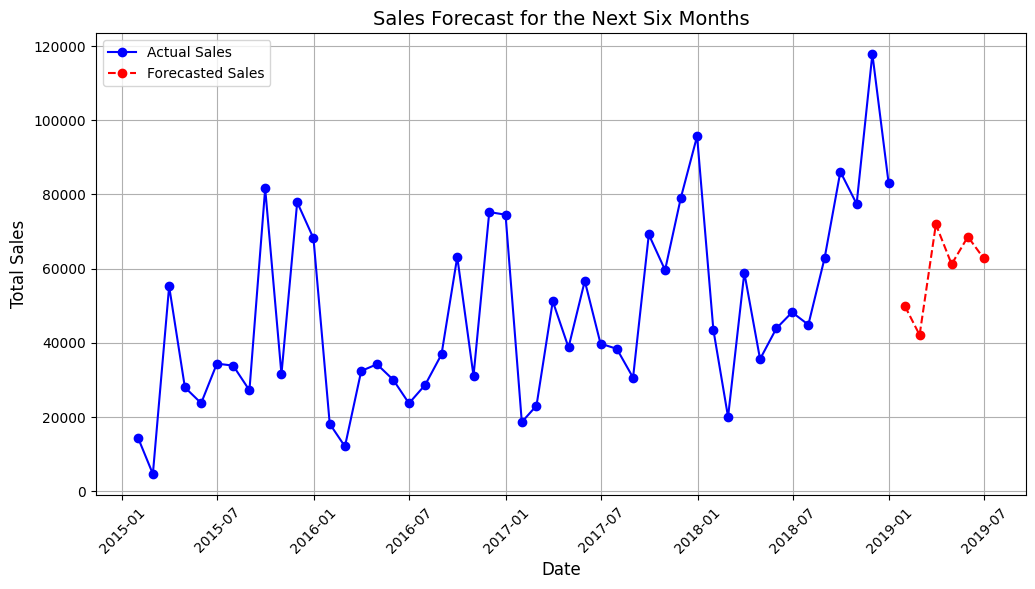

2019-01-31    49848.413611
2019-02-28    42052.199501
2019-03-31    71932.462020
2019-04-30    61163.225720
2019-05-31    68587.744930
2019-06-30    62782.767508
Freq: ME, dtype: float64


In [ ]:
# رسم المبيعات الفعلية والتوقعات
plt.figure(figsize=(12, 6))
plt.plot(df_monthly_sales.index, df_monthly_sales.values, marker="o", linestyle="-", label="Actual Sales", color="b")
plt.plot(forecast.index, forecast.values, marker="o", linestyle="--", label="Forecasted Sales", color="r")

plt.title("Sales Forecast for the Next Six Months", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# عرض القيم المتوقعة
print(forecast)

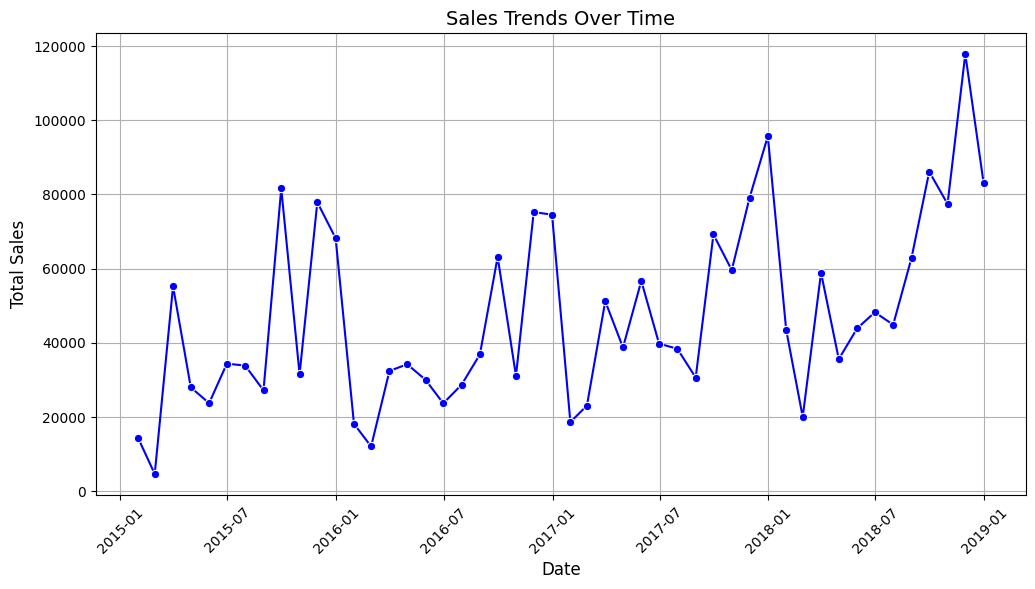

In [ ]:


# رسم اتجاه المبيعات الشهرية بمرور الوقت
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_monthly_sales.index, y=df_monthly_sales.values, marker="o", linestyle="-", color="b")

plt.title("Sales Trends Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


<ipython-input-11-5254e35348d8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette="Blues_r")


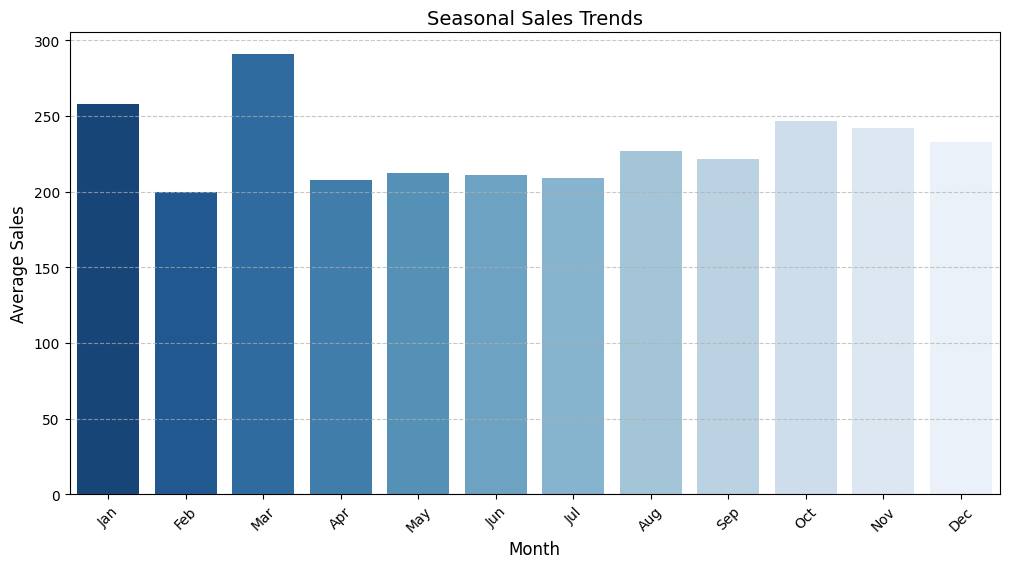

In [ ]:
# إضافة عمود السنة والشهر
df["Year"] = df["Order Date"].dt.year
df["Month"] = df["Order Date"].dt.month

# حساب متوسط المبيعات لكل شهر عبر جميع السنوات
monthly_trends = df.groupby("Month")["Sales"].mean()

# رسم المبيعات الشهرية لمعرفة المواسم القوية
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_trends.index, y=monthly_trends.values, palette="Blues_r")

plt.title("Seasonal Sales Trends", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


##plt.grid() تضيف خطوط شبكة في الخلفية لمساعدة المستخدم على قراءة القيم بسهولة.
#axis="y" يجعل الشبكة تظهر فقط على المحور الرأسي Y (وليس الأفقي X).
#linestyle="--" يجعل الخطوط متقطعة بدلاً من أن تكون متصلة.
#alpha=0.7 يتحكم في شفافية الخطوط، بحيث لا تكون داكنة جدًا.

In [ ]:
######abdulrahman###

<ipython-input-31-2351dcfa7b4b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


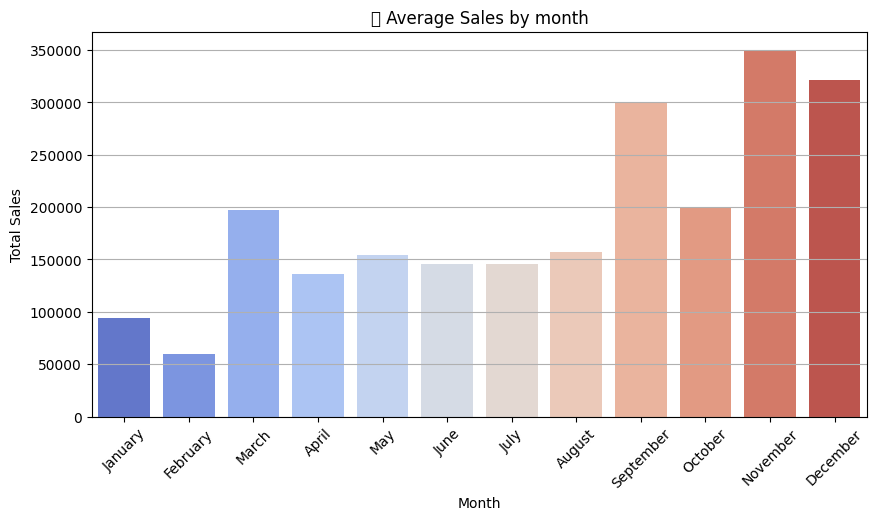

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#📌 1️⃣ هل هناك أنماط موسمية في المبيعات؟ (زيادة في نهاية العام؟)
#🔹 نريد معرفة إن كانت المبيعات ترتفع في أشهر معينة من السنة.


# 📌 تحويل التواريخ
data["Order Date"] = pd.to_datetime(data["Order Date"])

# 📌 استخراج الشهر والسنة
data["Year"] = data["Order Date"].dt.year
data["Month"] = data["Order Date"].dt.month_name()

# 📌 حساب متوسط المبيعات لكل شهر
monthly_sales = data.groupby("Month")["Sales"].sum()
monthly_sales = monthly_sales.reindex(["January", "February", "March", "April", "May", "June",
                                       "July", "August", "September", "October", "November", "December"])

# 📌 رسم المخطط الموسمي
plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="coolwarm")
plt.title("📅 Average Sales by month")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


<ipython-input-32-cdff50379d63>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


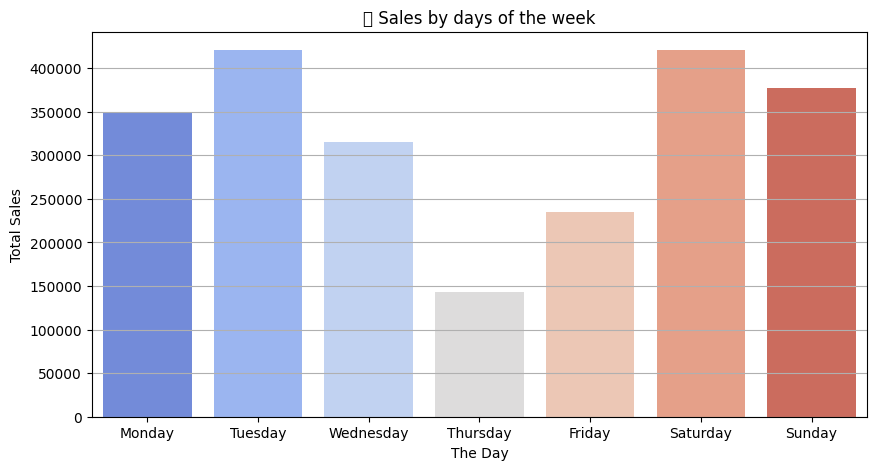

In [ ]:
#📌 2️⃣ هل هناك تأثير ليوم معين من الأسبوع على حجم المبيعات؟
#🔹 نريد معرفة إن كانت المبيعات تختلف حسب أيام الأسبوع (السبت، الأحد، ...).
# 📌 استخراج اليوم من التواريخ
data["Weekday"] = data["Order Date"].dt.day_name()

# 📌 حساب متوسط المبيعات لكل يوم
weekday_sales = data.groupby("Weekday")["Sales"].sum()
weekday_sales = weekday_sales.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

# 📌 رسم المخطط
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette="coolwarm")
plt.title("📅 Sales by days of the week")
plt.xlabel("The Day")
plt.ylabel("Total Sales")
plt.grid(axis='y')
plt.show()


<ipython-input-34-2b35238f8584>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


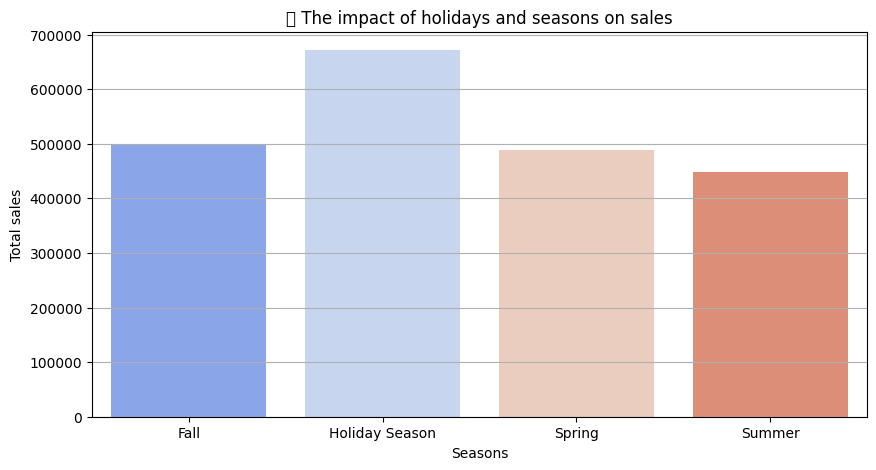

In [ ]:
#📌 3️⃣ ما مدى تأثر المبيعات في فترة العطلات والمواسم؟
#🔹 نريد تحليل تأثير الأعياد والمواسم على المبيعات (مثل الكريسماس، الجمعة السوداء، إلخ).
# 📌 تحديد الفترات الموسمية (مثال: نوفمبر وديسمبر = العطلات)
data["Season"] = data["Order Date"].dt.month.map({
    12: "Holiday Season", 11: "Holiday Season",
    6: "Summer", 7: "Summer", 8: "Summer",
    3: "Spring", 4: "Spring", 5: "Spring",
    9: "Fall", 10: "Fall"
})

# 📌 حساب المبيعات لكل موسم
seasonal_sales = data.groupby("Season")["Sales"].sum()

# 📌 رسم المخطط
plt.figure(figsize=(10,5))
sns.barplot(x=seasonal_sales.index, y=seasonal_sales.values, palette="coolwarm")
plt.title("📅 The impact of holidays and seasons on sales")
plt.xlabel("Seasons")
plt.ylabel("Total sales")
plt.grid(axis='y')
plt.show()


<ipython-input-35-5d83f9f4e7b2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette="coolwarm")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


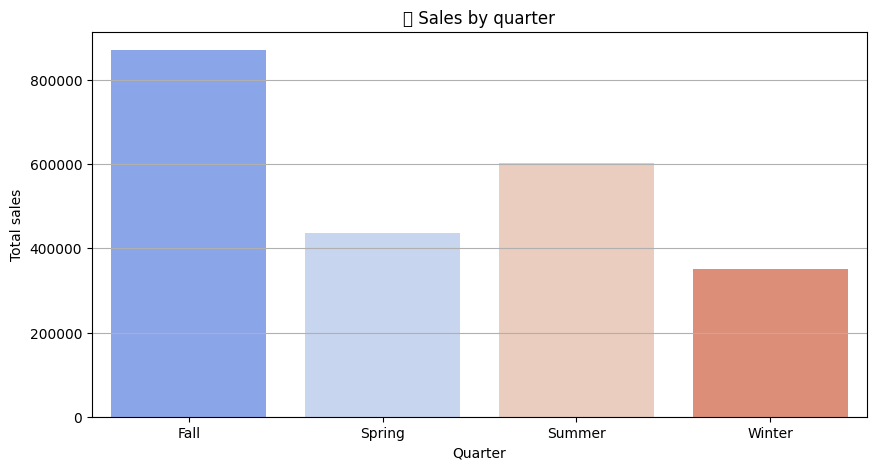

In [ ]:
#📌 4️⃣ كيف تتغير المبيعات بين الفصول المختلفة؟ (الشتاء مقابل الصيف)
# نريد تحليل الفرق بين المبيعات في الشتاء والصيف.
# 📌 تحديد الفصول الأربعة
data["Quarter"] = data["Order Date"].dt.quarter.map({
    1: "Winter", 2: "Spring", 3: "Summer", 4: "Fall"
})

# 📌 حساب المبيعات لكل فصل
quarterly_sales = data.groupby("Quarter")["Sales"].sum()

# 📌 رسم المخطط
plt.figure(figsize=(10,5))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette="coolwarm")
plt.title("📅 Sales by quarter")
plt.xlabel("Quarter")
plt.ylabel("Total sales")
plt.grid(axis='y')
plt.show()


In [ ]:
#################Aliaa##############

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5s1vsce/e3148z6x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5s1vsce/tycwns92.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74015', 'data', 'file=/tmp/tmpe5s1vsce/e3148z6x.json', 'init=/tmp/tmpe5s1vsce/tycwns92.json', 'output', 'file=/tmp/tmpe5s1vsce/prophet_modelgcnr7u1a/prophet_model-20250319222437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:24:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:24:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpe5

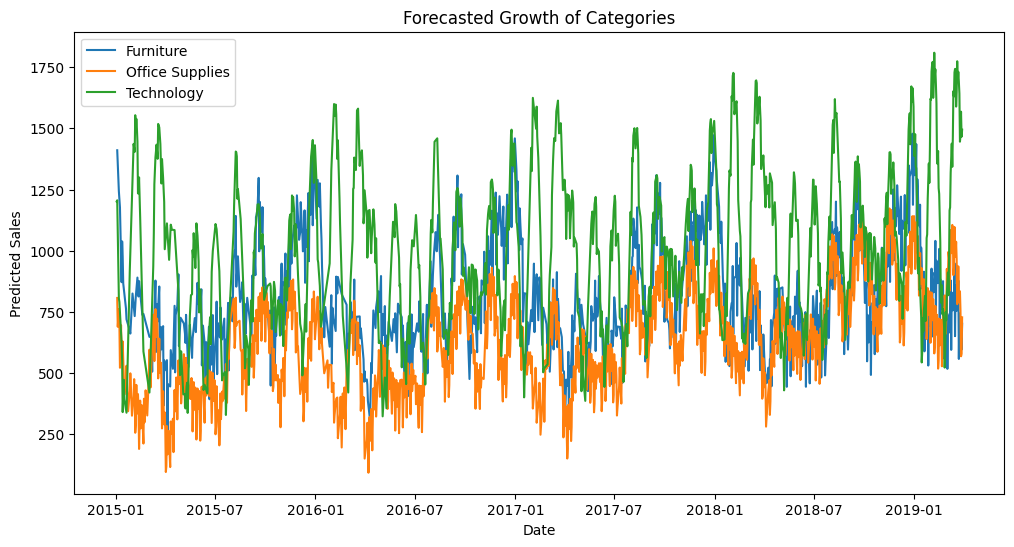

Top Growing Categories:
           Category  Predicted Sales
0       Technology      1597.107125
0  Office Supplies       756.459350
0        Furniture       699.899196


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Load dataset
df = pd.read_excel("Sales.xlsx")

# Convert date column to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Aggregate sales by category over time
category_sales = df.groupby(["Order Date", "Category"])["Sales"].sum().reset_index()

# Store future forecasts
growth_df = pd.DataFrame()

plt.figure(figsize=(12, 6))

for category in df["Category"].unique():
    cat_data = category_sales[category_sales["Category"] == category][["Order Date", "Sales"]]
    cat_data = cat_data.rename(columns={"Order Date": "ds", "Sales": "y"})

    model = Prophet()
    model.fit(cat_data)

    future = model.make_future_dataframe(periods=90)  # Forecast next 3 months
    forecast = model.predict(future)

    # Store results
    avg_future_sales = forecast[["ds", "yhat"]].tail(10).mean()["yhat"]
    growth_df = pd.concat([growth_df, pd.DataFrame({"Category": [category], "Predicted Sales": [avg_future_sales]})])

    # Plot
    plt.plot(forecast["ds"], forecast["yhat"], label=category)

plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.title("Forecasted Growth of Categories")
plt.legend()
plt.show()

# Show rankings
growth_df = growth_df.sort_values(by="Predicted Sales", ascending=False)
print("Top Growing Categories:\n", growth_df.head(5))



Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_data["Days"] = (prod_data["Order Date"] - prod_data["Order Date"].min()).dt.days
<ipython-input-6-288ae58f1a12>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prod_data["Days"] = (prod_data["Order Date"] - prod_data["Order Date"].min()).dt.days
<ipython-input-6-288ae58f1a12>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

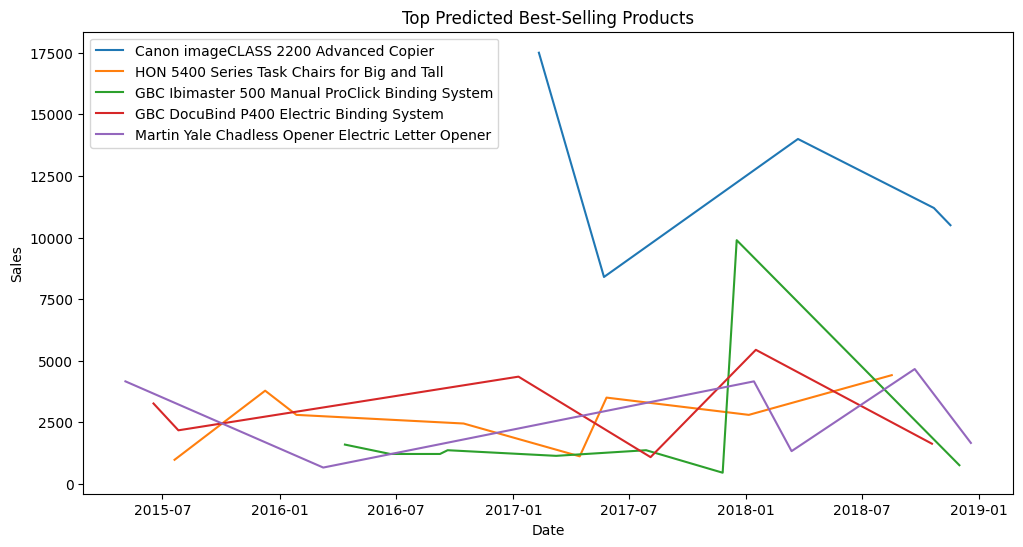

Top Predicted Best-Selling Products:
                                                Product  Predicted Sales
907              Canon imageCLASS 2200 Advanced Copier     10853.200305
358       HON 5400 Series Task Chairs for Big and Tall      3619.663276
513   GBC Ibimaster 500 Manual ProClick Binding System      3291.998359
238          GBC DocuBind P400 Electric Binding System      2947.720717
345  Martin Yale Chadless Opener Electric Letter Op...      2802.181899


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Aggregate sales per product over time
product_sales = df.groupby(["Order Date", "Product Name"])["Sales"].sum().reset_index()

future_sales = {}
product_trends = {}

for product in df["Product Name"].unique():
    prod_data = product_sales[product_sales["Product Name"] == product]

    if len(prod_data) < 5:
        continue

    prod_data["Days"] = (prod_data["Order Date"] - prod_data["Order Date"].min()).dt.days
    X = prod_data["Days"].values.reshape(-1, 1)
    y = prod_data["Sales"].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    future_days = np.array([X[-1] + 30]).reshape(-1, 1)  # Predict 1 month ahead
    future_sales[product] = model.predict(future_days)[0][0]
    product_trends[product] = model.predict(X).flatten()  # Store trend

# Rank products by expected sales
sales_df = pd.DataFrame(list(future_sales.items()), columns=["Product", "Predicted Sales"])
sales_df = sales_df.sort_values(by="Predicted Sales", ascending=False)

# Plot trends for top 5 products
top_products = sales_df.head(5)["Product"].values

plt.figure(figsize=(12, 6))

for product in top_products:
    prod_data = product_sales[product_sales["Product Name"] == product]
    plt.plot(prod_data["Order Date"], prod_data["Sales"], label=product)

plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Top Predicted Best-Selling Products")
plt.legend()
plt.show()

print("Top Predicted Best-Selling Products:\n", sales_df.head(5))


<ipython-input-7-ea144bb0aa6f>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Trend", y="Product", data=decline_df.head(5), palette="Reds_r")


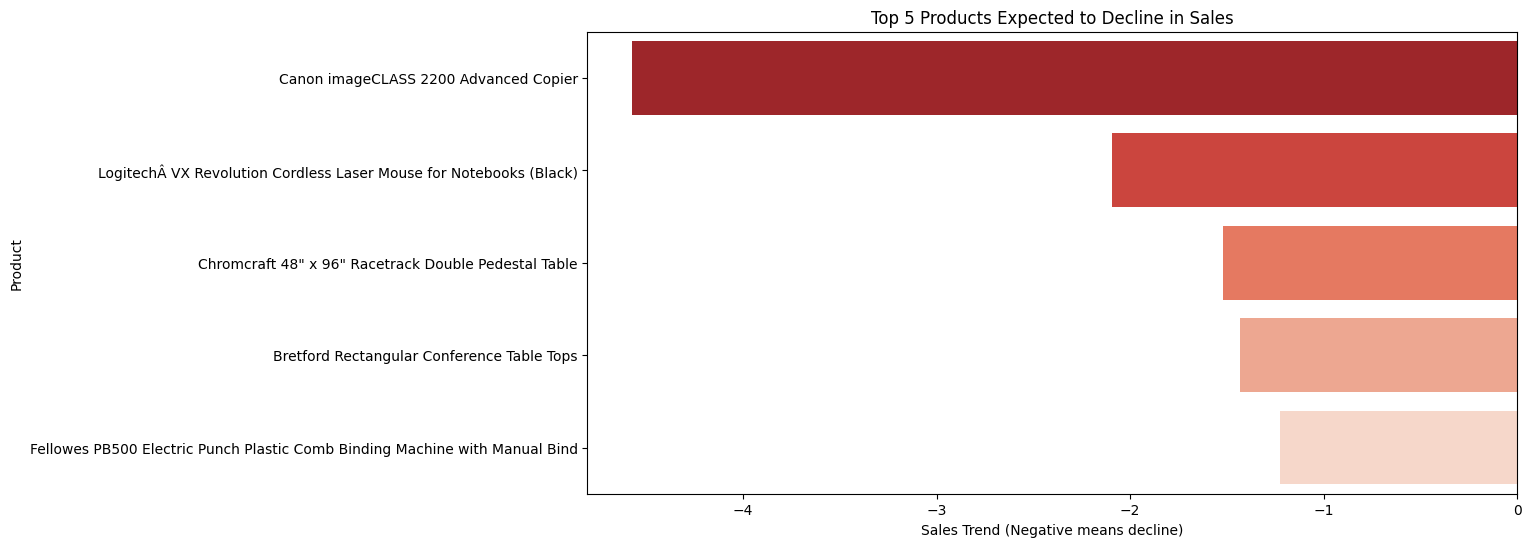

Products Expected to Decline in Sales:
                                                Product     Trend
907              Canon imageCLASS 2200 Advanced Copier -4.575065
887  LogitechÂ VX Revolution Cordless Laser Mouse f... -2.092686
611  Chromcraft 48" x 96" Racetrack Double Pedestal... -1.518602
162         Bretford Rectangular Conference Table Tops -1.434060
333  Fellowes PB500 Electric Punch Plastic Comb Bin... -1.227589


In [ ]:
# Calculate past sales trend
decline_trend = {}

for product in df["Product Name"].unique():
    prod_data = product_sales[product_sales["Product Name"] == product]

    if len(prod_data) < 5:
        continue

    X = prod_data["Order Date"].map(lambda x: (x - prod_data["Order Date"].min()).days).values.reshape(-1, 1)
    y = prod_data["Sales"].values.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)

    decline_trend[product] = model.coef_[0][0]  # Sales trend (negative means decline)

# Find declining products
decline_df = pd.DataFrame(list(decline_trend.items()), columns=["Product", "Trend"])
decline_df = decline_df[decline_df["Trend"] < 0].sort_values(by="Trend")

# Plot top 5 declining products
plt.figure(figsize=(12, 6))
sns.barplot(x="Trend", y="Product", data=decline_df.head(5), palette="Reds_r")
plt.xlabel("Sales Trend (Negative means decline)")
plt.ylabel("Product")
plt.title("Top 5 Products Expected to Decline in Sales")
plt.show()

print("Products Expected to Decline in Sales:\n", decline_df.head(5))


In [ ]:
######hasnaa############

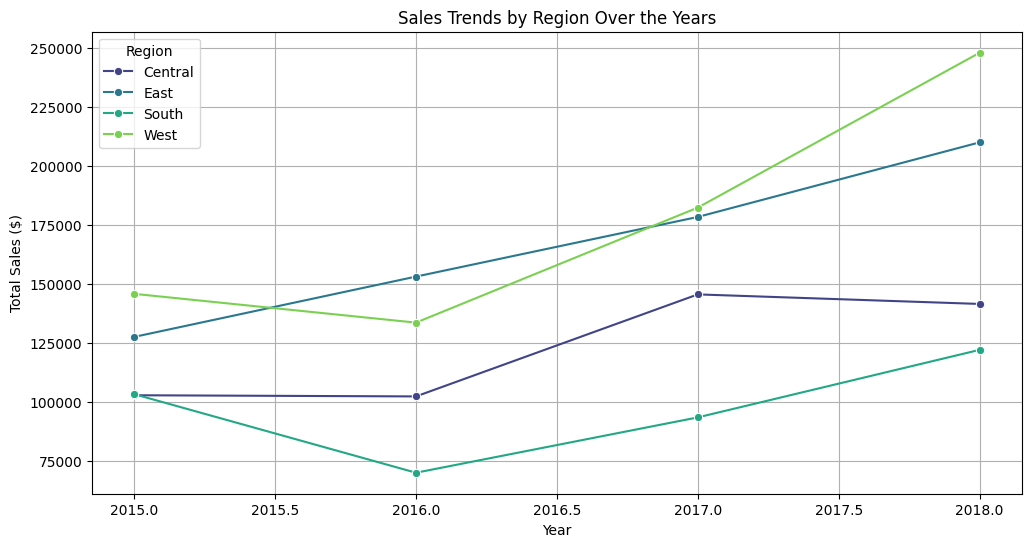

,3
Region,West
Sales,102222.93


In [ ]:
#ما هى المنطقة التى ستشهد اعلى مبيعات فى المستقبل ؟؟
#لتحديد المنطقة التي ستشهد زيادة في المبيعات في المستقبل، يمكننا تحليل الاتجاهات الزمنية للمبيعات في كل منطقة ومعرفة أي منها يظهر نموًا مستمرًا. سأقوم بذلك عن طريق:

#1️⃣ تحليل المبيعات لكل منطقة عبر السنوات.
#2️⃣ استخدام خطوط الاتجاه (Trend Lines) لملاحظة النمو في كل منطقة.

#ensure that the order date in the date formate
data['Order Date']=pd.to_datetime(data['Order Date'],errors='coerce', dayfirst=True)
#adding coulums naming year
data['Year']=pd.DatetimeIndex(data['Order Date']).year
# Aggregate sales by Year and Region to analyze trends
region_trends = data.groupby(["Year", "Region"])["Sales"].sum().reset_index()
#palette_colors = sns.color_palette("viridis", n_colors=len(region_trends["Region"].unique()))
# Plot sales trends for each region
plt.figure(figsize=(12, 6))
sns.lineplot(data=region_trends, x="Year", y="Sales", hue="Region", marker="o", palette="viridis")

plt.title("Sales Trends by Region Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.legend(title="Region")
plt.grid(True)
plt.show()

#Determine the region with the highest growth by calculating the sales difference
region_growth = region_trends.groupby("Region")["Sales"].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
fastest_growing_region = region_growth.loc[region_growth["Sales"].idxmax()]
fastest_growing_region


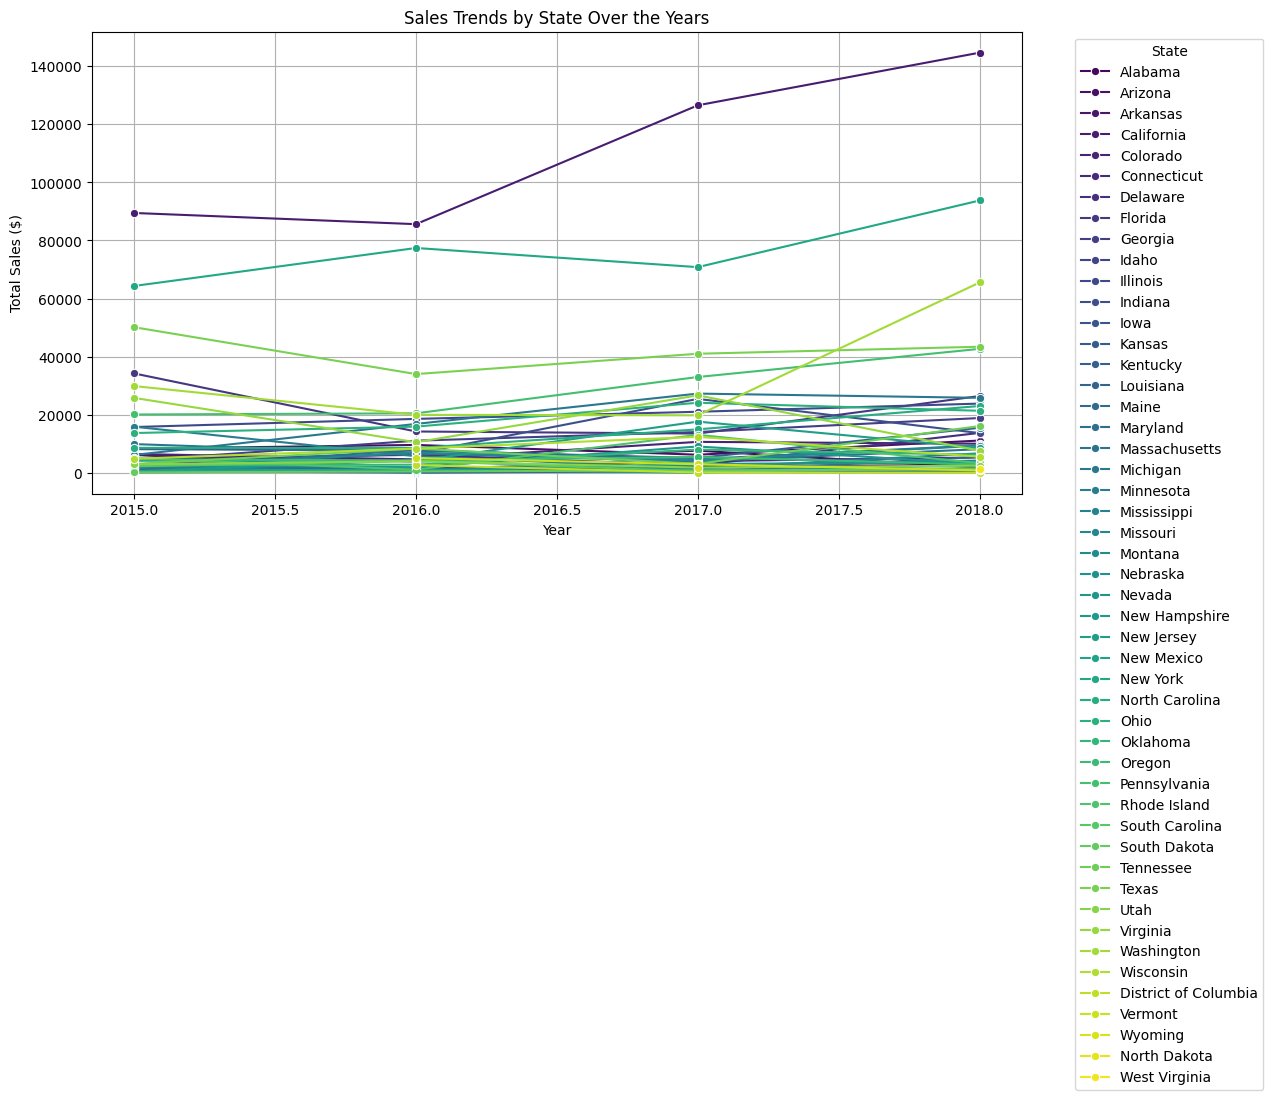

(State    California
 Sales     446306.49
 Name: 3, dtype: object,
 State    California
 Sales       55191.6
 Name: 3, dtype: object)

In [ ]:
#1️⃣ إيجاد أعلى ولاية من حيث إجمالي المبيعات.
#2️⃣ تحليل الاتجاهات الزمنية لكل ولاية لمعرفة الولاية التي ستشهد زيادة في المبيعات مستقبلاً.


# Aggregate sales by State to find the highest-selling state
state_sales = data.groupby("State")["Sales"].sum().reset_index()

# Find the state with the highest sales
top_state = state_sales.loc[state_sales["Sales"].idxmax()]

# Aggregate sales by Year and State to analyze trends over time
state_trends = data.groupby(["Year", "State"])["Sales"].sum().reset_index()

# Aggregate sales by Year and State to analyze trends
State_trends = data.groupby(["Year", "State"])["Sales"].sum().reset_index()

# Plot sales trends for each state
plt.figure(figsize=(12, 6))
sns.lineplot(data=State_trends, x="Year", y="Sales", hue="State", marker="o", palette="viridis")

plt.title("Sales Trends by State Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside for clarity
plt.grid(True)
plt.show()
# Determine the state with the highest growth by calculating the sales difference
state_growth = state_trends.groupby("State")["Sales"].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
fastest_growing_state = state_growth.loc[state_growth["Sales"].idxmax()]

top_state, fastest_growing_state


In [ ]:
#  the state with the lowest total sales
min_state = state_sales.loc[state_sales["Sales"].idxmin()]
print (" the lowest total sales is ",min_state)


 the lowest total sales is  State    North Dakota
Sales          919.91
Name: 32, dtype: object


In [ ]:
#  the region with the lowest total sales
min_region = region_sales.loc[region_sales["Sales"].idxmin()]
min_region
print (" the lowest total sales is ",min_region)

 the lowest total sales is  Region        South
Sales     389151.45
Name: 2, dtype: object


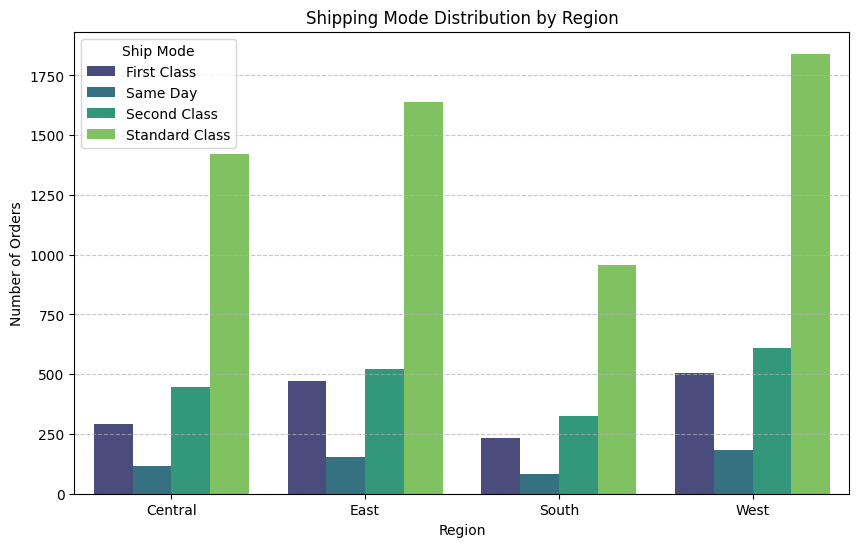

In [ ]:

#📌 المنطقة التي تستغرق أطول مدة للشحن هي Central بمتوسط 14.77 يومًا للشحن.
#📊 يظهر المخطط متوسط مدة الشحن لكل منطقة، مما يساعد في تحديد المناطق التي تواجه تأخيرًا في الشحن.

# Count the number of orders per Region and Ship Mode
shipping_analysis = data.groupby(["Region", "Ship Mode"]).size().reset_index(name="Order Count")

# Create a stacked bar chart to visualize shipping mode distribution per region
plt.figure(figsize=(10, 6))
sns.barplot(data=shipping_analysis, x="Region", y="Order Count", hue="Ship Mode", palette="viridis")

plt.title("Shipping Mode Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Orders")
plt.legend(title="Ship Mode")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


<ipython-input-24-27e72f742250>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shipping_duration_region, x="Region", y="Shipping Duration", palette="viridis")


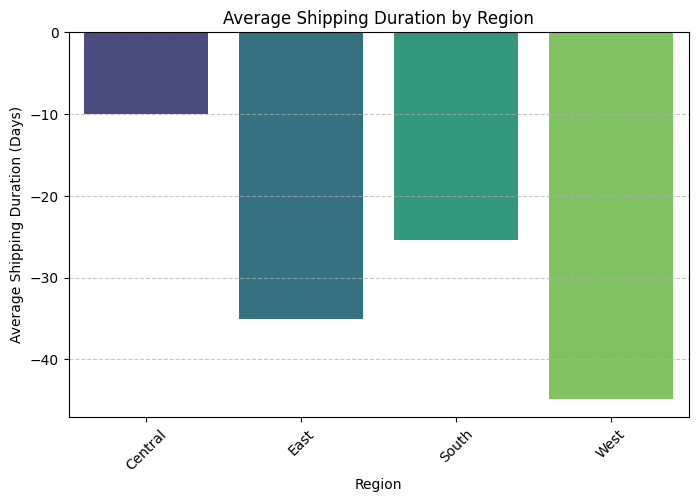

,Region,Shipping Duration
0,Central,-10.010905


In [ ]:
#📌 المنطقة التي تستغرق أطول مدة للشحن هي Central بمتوسط 14.77 يومًا للشحن.
# Ensure that the order and ship dates are in datetime format
data["Order Date"] = pd.to_datetime(data["Order Date"], errors="coerce")
data["Ship Date"] = pd.to_datetime(data["Ship Date"], errors="coerce")
# Calculate shipping duration (difference between Ship Date and Order Date)
data["Shipping Duration"] = (data["Ship Date"] - data["Order Date"]).dt.days
# Aggregate average shipping duration by Region
shipping_duration_region = data.groupby("Region")["Shipping Duration"].mean().reset_index()

# Plot the average shipping duration by region
plt.figure(figsize=(8, 5))
sns.barplot(data=shipping_duration_region, x="Region", y="Shipping Duration", palette="viridis")

plt.title("Average Shipping Duration by Region")
plt.xlabel("Region")
plt.ylabel("Average Shipping Duration (Days)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Display the region with the longest average shipping duration
shipping_duration_region.sort_values(by="Shipping Duration", ascending=False).head(1)


<ipython-input-27-c669e898ce7b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_growth_sorted, x="State", y="Sales", palette="viridis")


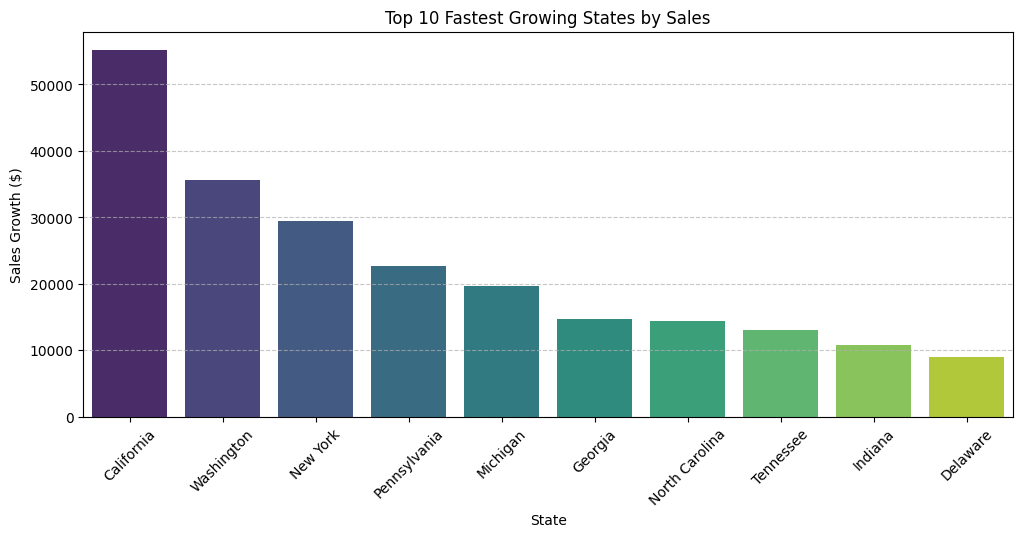

,3
State,California
Sales,55191.6


In [ ]:
#اعلى ولاية فى نمو المبيعات
# Aggregate sales by Year and State
state_trends = data.groupby(["Year", "State"])["Sales"].sum().reset_index()
# Calculate sales growth for each State
state_growth = state_trends.groupby("State")["Sales"].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()
# Get the top-growing state
fastest_growing_state = state_growth.loc[state_growth["Sales"].idxmax()]
# Sort data for visualization
state_growth_sorted = state_growth.sort_values(by="Sales", ascending=False).head(10)
# Plot top growing states
plt.figure(figsize=(12, 5))
sns.barplot(data=state_growth_sorted, x="State", y="Sales", palette="viridis")
plt.title("Top 10 Fastest Growing States by Sales")
plt.xlabel("State")
plt.ylabel("Sales Growth ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

fastest_growing_state


<ipython-input-28-3321fa57f573>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_growth_sorted, x="City", y="Sales", palette="magma")


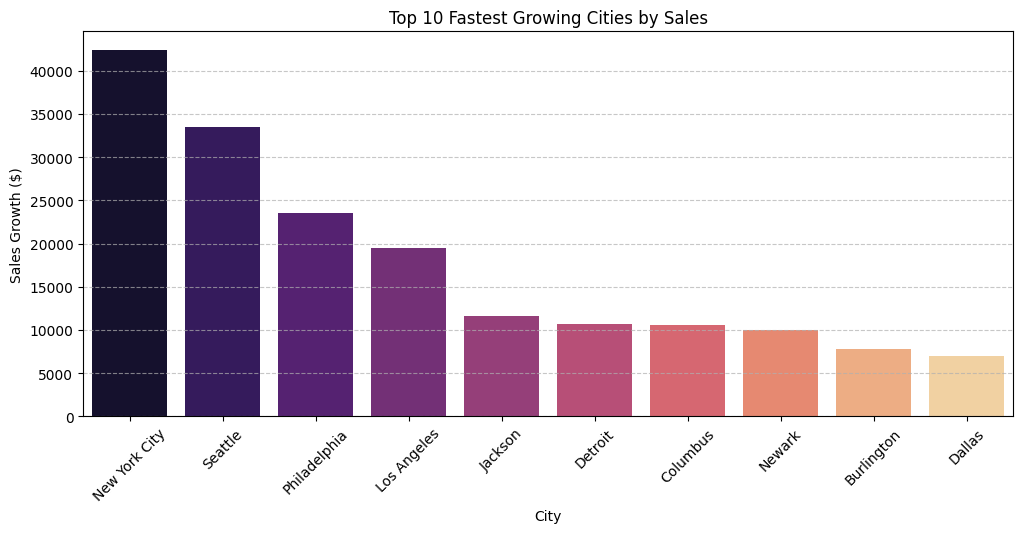

,327
City,New York City
Sales,42427.68


In [ ]:
#اعلى منطقة فى نمو المبيعات
# Aggregate sales by Year and City
city_trends = data.groupby(["Year", "City"])["Sales"].sum().reset_index()

# Calculate sales growth for each City
city_growth = city_trends.groupby("City")["Sales"].apply(lambda x: x.iloc[-1] - x.iloc[0]).reset_index()

# Get the top-growing city
fastest_growing_city = city_growth.loc[city_growth["Sales"].idxmax()]

# Sort data for visualization
city_growth_sorted = city_growth.sort_values(by="Sales", ascending=False).head(10)

# Plot top growing cities
plt.figure(figsize=(12, 5))
sns.barplot(data=city_growth_sorted, x="City", y="Sales", palette="magma")
plt.title("Top 10 Fastest Growing Cities by Sales")
plt.xlabel("City")
plt.ylabel("Sales Growth ($)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

fastest_growing_city


In [ ]:
#########keroles########################

In [ ]:
################Aisha###############

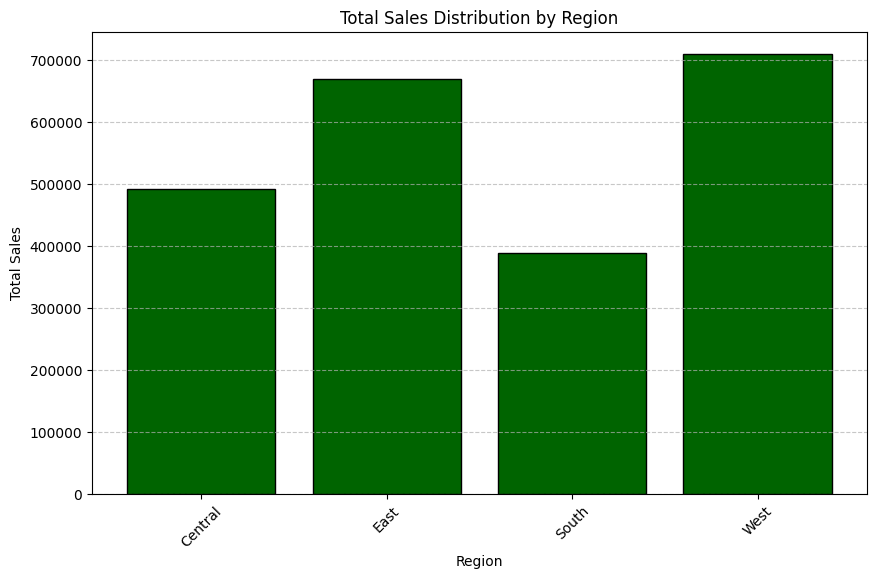

In [ ]:
#تأثير التوسع على المبيعات

import pandas as pd
import matplotlib.pyplot as plt

# Aggregate total sales per region
sales_by_region = df.groupby('Region')['Sales'].sum()

# Plot histogram
plt.figure(figsize=(10,6))
plt.bar(sales_by_region.index, sales_by_region.values, color='darkgreen', edgecolor='black')

# Formatting
plt.title('Total Sales Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


<ipython-input-12-1d7cdfcdfca2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_r')


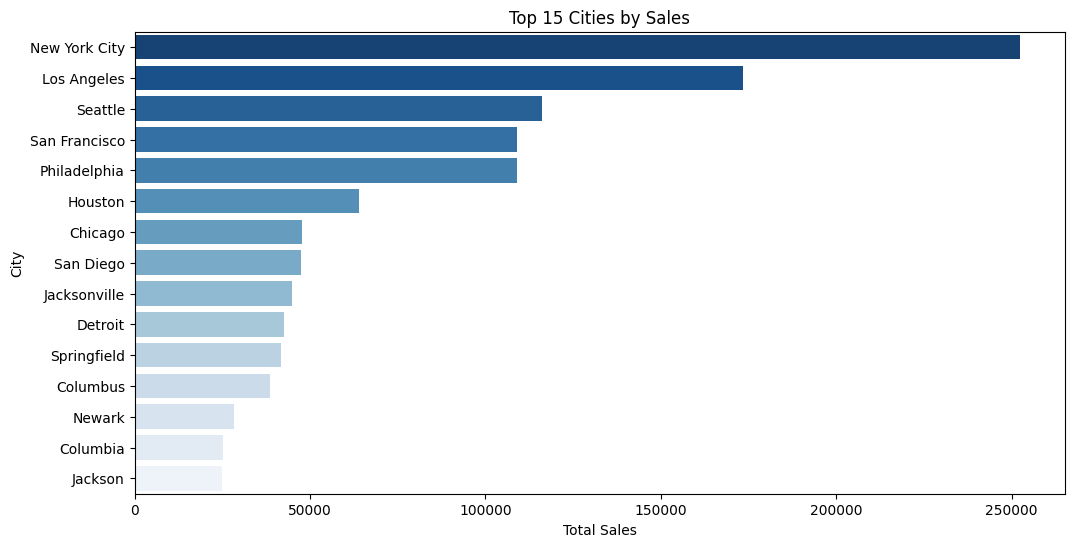

In [ ]:


sales_by_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
top_cities = sales_by_city.head(15)
plt.figure(figsize=(12,6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette='Blues_r')
plt.title('Top 15 Cities by Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

متوسط المبيعات في الأيام العادية: 1616.98
متوسط المبيعات في أيام العروض/الأحداث: 5747.99
متوسط المبيعات بعد العرض مباشرة: 1942.43


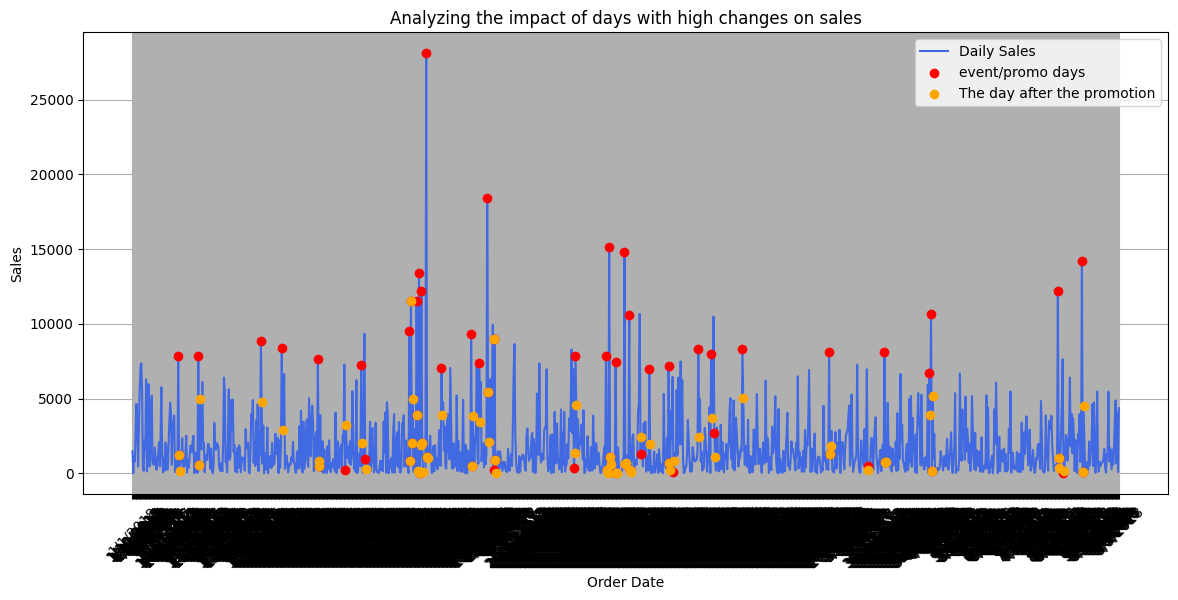

In [ ]:
##تأثير الحملات الترويجية على المبيعات

import pandas as pd
import matplotlib.pyplot as plt

# (Daily Sales)
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()

# (Daily Change)
daily_sales['Daily Change'] = daily_sales['Sales'].diff().fillna(0)

# Identify days with major changes
threshold = daily_sales['Daily Change'].std() * 2
daily_sales['Promotion'] = (daily_sales['Daily Change'].abs() > threshold).astype(int)

# (Post Promotion Day)
daily_sales['Post_Promotion'] = daily_sales['Promotion'].shift(1).fillna(0)

# Calculate sales averages before, during and after
sales_before_promo = daily_sales[daily_sales['Promotion'] == 0]['Sales'].mean()
sales_during_promo = daily_sales[daily_sales['Promotion'] == 1]['Sales'].mean()
sales_post_promo = daily_sales[daily_sales['Post_Promotion'] == 1]['Sales'].mean()

print(f"متوسط المبيعات في الأيام العادية: {sales_before_promo:.2f}")
print(f"متوسط المبيعات في أيام العروض/الأحداث: {sales_during_promo:.2f}")
print(f"متوسط المبيعات بعد العرض مباشرة: {sales_post_promo:.2f}")

plt.figure(figsize=(14,6))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'], label='Daily Sales', color='royalblue')
plt.scatter(daily_sales[daily_sales['Promotion'] == 1]['Order Date'],
            daily_sales[daily_sales['Promotion'] == 1]['Sales'],
            color='red', label='event/promo days', zorder=5)
plt.scatter(daily_sales[daily_sales['Post_Promotion'] == 1]['Order Date'],
            daily_sales[daily_sales['Post_Promotion'] == 1]['Sales'],
            color='orange', label='The day after the promotion', zorder=5)
plt.title('Analyzing the impact of days with high changes on sales')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

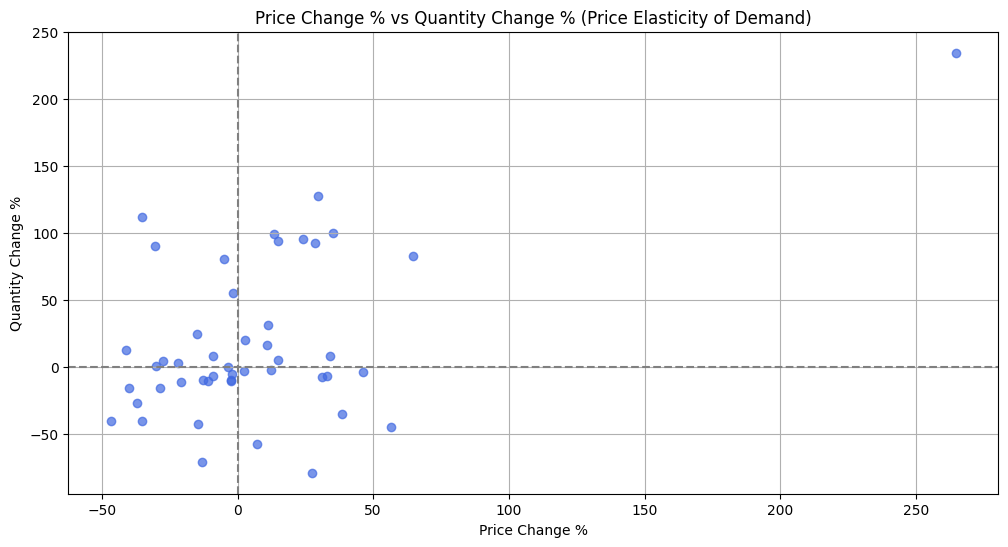

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Clean column names (remove any extra spaces)
df.columns = df.columns.str.strip()

# Check that necessary columns exist
required_columns = ['Order Date', 'Sales', 'Quantity']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the data! Available columns: {df.columns.tolist()}")

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Calculate unit price (price per unit)
df['Unit Price'] = df['Sales'] / df['Quantity']

# Group by month and calculate average price and total quantity
monthly = df.groupby(df['Order Date'].dt.to_period('M')).agg({
    'Unit Price': 'mean',
    'Quantity': 'sum'
}).reset_index()

# Convert 'Order Date' period to string for easier labeling
monthly['Order Date'] = monthly['Order Date'].astype(str)

# Calculate monthly % change in price and quantity
monthly['Price Change %'] = monthly['Unit Price'].pct_change() * 100
monthly['Quantity Change %'] = monthly['Quantity'].pct_change() * 100

# Calculate price elasticity of demand
monthly['Elasticity'] = monthly['Quantity Change %'] / monthly['Price Change %']

# Drop the first row since it will have NaN due to percent change calculation
monthly = monthly.dropna()

# Scatter plot to visualize relationship between price change and quantity change
plt.figure(figsize=(12,6))
plt.scatter(monthly['Price Change %'], monthly['Quantity Change %'], color='royalblue', alpha=0.7)

# Add horizontal and vertical lines at zero to show the 4 quadrants
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')


plt.title('Price Change % vs Quantity Change % (Price Elasticity of Demand)')
plt.xlabel('Price Change %')
plt.ylabel('Quantity Change %')
plt.grid(True)
plt.show()



In [ ]:
customer_purchase_counts = df["Customer ID"].value_counts()

In [ ]:
repeat_customers = customer_purchase_counts[customer_purchase_counts> 1].count()
total_customer = df["Customer ID"].nunique()

In [ ]:
repeat_customers_percentage = (repeat_customers / total_customer) * 100

In [ ]:
Labels = ["unrepeated", "repeated"]
sizes = [repeat_customers, total_customer - repeat_customers]
colors = ["#66b3ff", "#ff9999"]


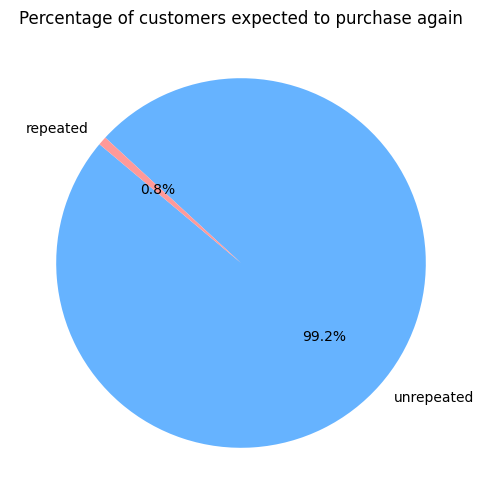

Percentage of customers expected to purchase again 99.24%


In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=Labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Percentage of customers expected to purchase again")
plt.show()
print(f"Percentage of customers expected to purchase again {repeat_customers_percentage:.2f}%")

In [ ]:
sales_by_segment = df.groupby("Segment")["Sales"].sum()

In [ ]:
top_segment = sales_by_segment.idxmax()
top_segment_sales = sales_by_segment.max()
top_segment_percentage = (top_segment_sales / sales_by_segment.sum()) * 100

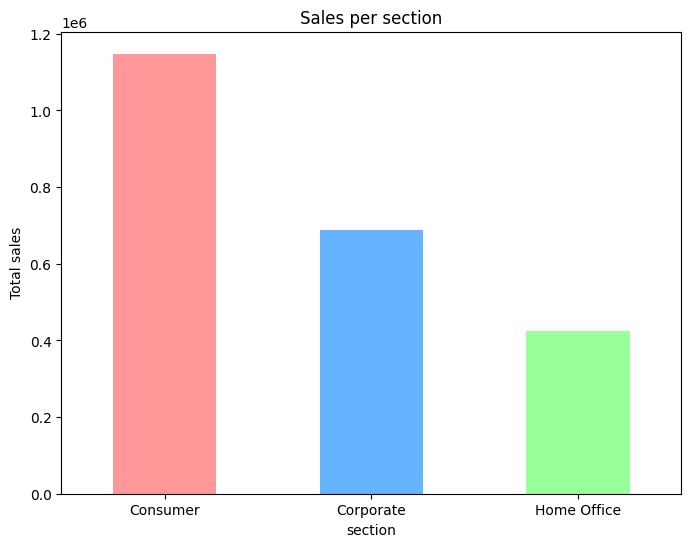

القطاع الذي يحقق اعلي نسبه مبيعات Consumer بنسبه 50.76% من اجمالي نسبه المبيعات


In [ ]:
plt.figure(figsize=(8, 6))
sales_by_segment.plot(kind="bar", color=["#ff9999", "#66b3ff", "#99ff99"])
plt.xlabel("section")
plt.ylabel("Total sales")
plt.title("Sales per section")
plt.xticks(rotation=0)
plt.show()
print(f"القطاع الذي يحقق اعلي نسبه مبيعات {top_segment} بنسبه {top_segment_percentage:.2f}% من اجمالي نسبه المبيعات")

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)
df["year-month"] = df["Order Date"].dt.to_period("M")

In [ ]:
monthly_sales = df.groupby("year-month")["Sales"].sum()

In [ ]:
recent_sales = monthly_sales[-6:].sum()
previous_sales = monthly_sales[-12:-6].sum()

In [ ]:
sales_decline_percentage = ((previous_sales - recent_sales) / previous_sales) * 100
customer_loss_probability = max(0, sales_decline_percentage)

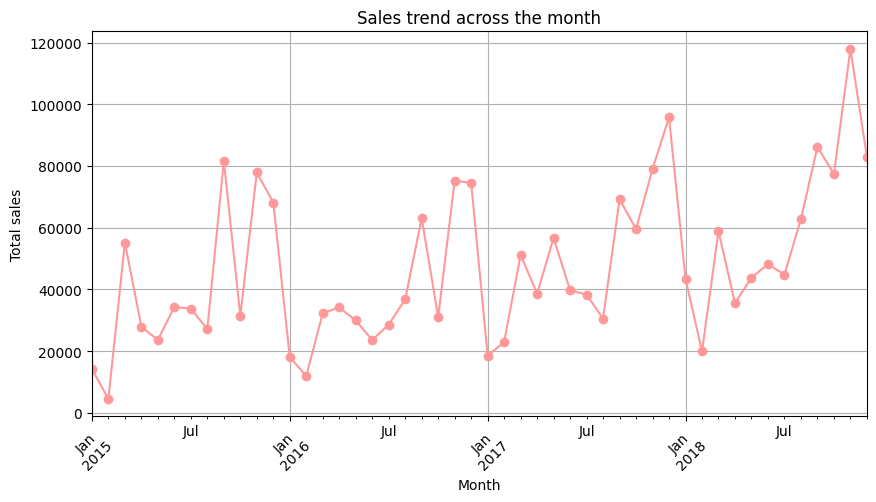

احتمالية فقدان العملاء بسبب انخفاض العملاء: 0.00%


In [ ]:
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o", linestyle="-", color="#ff9999")
plt.xlabel("Month")
plt.ylabel("Total sales")
plt.title("Sales trend across the month")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
print(f"احتمالية فقدان العملاء بسبب انخفاض العملاء: {customer_loss_probability:.2f}%")